# Exploring the Gender Pay Gap Across Industries

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Despite progress towards gender equality in the workplace, significant disparities in pay between men and women persist across various industries. Understanding the factors contributing to these disparities is essential for addressing the gender pay gap effectively.

The gender pay gap impacts economic stability and personal well-being for many individuals. Addressing it can lead to a more equitable workforce and improved societal outcomes.



## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

-What is the average salary difference between men and women in various industries?
-How do education levels and years of experience correlate with the gender pay gap?
-Are there specific industries where the gender pay gap is more pronounced?
-What role do company diversity and inclusion initiatives play in mitigating the pay gap?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

-Visual representations such as bar charts comparing average salaries by gender across industries.
-Scatter plots correlating years of experience and education level with salary differences.
-A summary of findings highlighting industries with significant disparities and potential factors influencing these gaps.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*

->Glassdoor Gender Pay Gap.csv
This dataset provides insights into income disparities based on job titles and gender. By analyzing the base pay and bonuses for various job titles, you can identify specific roles where the gender pay gap is most significant. The demographic data (age, education, seniority) included in this dataset allows for a deeper exploration of how these factors correlate with salary differences.

->inc_occ_gender.csv
This dataset from the Bureau of Labor Statistics offers median weekly incomes segmented by occupation and sex. It can be used to compare and validate findings from the Glassdoor dataset, especially in understanding industry-wide trends in gender pay gaps. The data on total median income and the breakdown by gender will help highlight industries with pronounced disparities.

->Salary_Data.csv
This dataset consolidates information on age, experience, education level, and salary across various roles. It will serve as a comprehensive source to correlate individual characteristics (such as education and experience) with salary differences. By merging this data with the previous two datasets, you can create a more holistic view of the gender pay gap, examining how personal attributes impact salary in conjunction with industry-specific trends.

Merging by Job Title and Gender: All three datasets contain job title and gender as key attributes. You can merge them to analyze salary differences within specific roles across various industries.

Comparative Analysis: Use the Glassdoor dataset to explore salary structures within specific job titles and then validate these findings with the broader industry data from the BLS dataset. This comparison will highlight whether the trends observed in specific job titles reflect wider industry patterns.

Correlational Studies: Use the Salary_Data dataset to perform statistical analyses, such as regression or correlation, to investigate how years of experience and education levels interact with the gender pay gap identified in the other datasets. This will enable you to provide a more nuanced understanding of the factors influencing salary disparities.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

## Importing Libraries

In [140]:

import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from scipy import stats
import plotly.express as px
import seaborn as sns

from   sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from   sklearn.tree import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures
from   sklearn.metrics import accuracy_score
from   sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error



## Data Exploration

In [141]:
# Start your code here
import pandas as pd

# Define the file paths
file_paths = {
    "Glassdoor": "datasets/Glassdoor Gender Pay Gap.csv",
    "Income Occupation Gender": "datasets/inc_occ_gender.csv",
    "Salary Data": "datasets/Salary_Data.csv"
}

datasets = {}
for name, path in file_paths.items():
    datasets[name] = pd.read_csv(path)

# Display the first few rows of each dataset
for name, data in datasets.items():
    print(f"{name} Overview:")
    print(data.head(), "\n")

Glassdoor Overview:
              JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus  
0          2    42363   9938  
1          5   108476  11128  
2          5    90208   9268  
3          4   108080  10154  
4          5    99464   9319   

Income Occupation Gender Overview:
                        Occupation  All_workers All_weekly  M_workers  \
0                  ALL OCCUPATIONS       109080        809      60746   
1                       MANAGEMENT        12480       1351       7332   
2                 Chief executives         1046       2041        763   
3  General and

In [142]:
df = pd.read_csv('datasets/Glassdoor Gender Pay Gap.csv')

In [143]:
df2 = pd.read_csv('datasets/Salary_Data.csv')
print(df2.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [144]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [145]:
df.shape

(1000, 9)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [147]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [148]:
df.isna().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [149]:
df2.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [150]:
# Drop rows with missing values
df2 = df2.dropna()
print(df2.isna().sum())


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [151]:
df['TotalSalary']= df['BasePay']+df['Bonus']
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalSalary
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


## Checking the Outliers in the Dataset
To explore the presence of outliers in the dataset, we first used a boxplot visualization. Boxplots are useful for identifying any extreme values or outliers that deviate significantly from the rest of the data. 

/var/folders/fn/_tmwdkq94cs2v1kdtvk6lzv80000gn/T/ipykernel_26955/2700123039.py:3: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



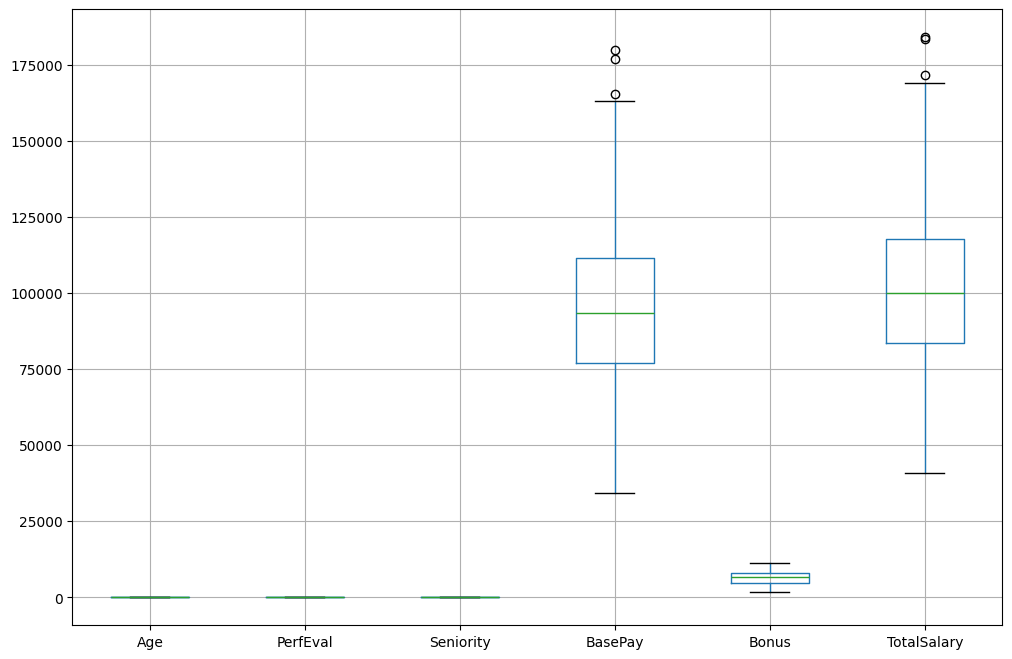

In [152]:
fig = plt.figure(figsize =(12,8))
df.boxplot()
fig.show()


Upon reviewing the boxplot, we observed that the data appears relatively stable with only a few outliers. The distribution of most of the variables seems normal, indicating no significant skew. However, we noticed that there are some outliers present in two columns: BasePay and Total salary. These outliers are likely due to higher salary values for certain individuals, which is common in large organizations or specialized roles.

It is important to note that these outliers are not necessarily erroneous or problematic. In fact, it makes sense that individuals with higher base pay will have correspondingly higher total salaries (which include bonuses or other compensation). Therefore, these outliers reflect higher-paying positions and do not suggest data issues.

To further investigate these outliers, we can calculate the specific values that qualify as outliers for the BasePay and Total columns using statistical methods like the IQR (Interquartile Range) or by directly examining the top and bottom salary figures.

In [153]:
IQR_BasePay = df['BasePay'].quantile(0.75)-df['BasePay'].quantile(0.25)
IQR_BasePay

34707.75

In [154]:
#To get the upper outlier
upper_outlier = df['BasePay'].quantile(0.75)+1.6*IQR_BasePay
upper_outlier

167090.4

In [155]:
#To get the lower outlier
lower_outlier = df['BasePay'].quantile(0.25)-1.6*IQR_BasePay
lower_outlier

21317.85

In [156]:
#To get the outlier
outliers = df[(df['BasePay']>upper_outlier)]
outliers

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalSalary
353,Manager,Male,59,4,PhD,Sales,5,176789,6773,183562
927,Manager,Male,58,1,PhD,Management,4,179726,4284,184010


In [157]:
df.drop(outliers.index, inplace = True)

In [158]:
df.shape

(998, 10)

Since these outliers are significantly higher than most of the data, we decided to remove them from the dataset to prevent them from skewing the analysis. In this case, the high total salaries for the two managerial roles seemed significantly higher than the rest of the dataset. Given that outliers can sometimes represent rare but valid data points (e.g., high-level executives or rare situations), we decided to remove them to maintain a more representative distribution of the data for analysis.

By removing these outliers, the dataset now reflects a more accurate picture of the general salary trends, which will help in further exploration of gender pay gaps and other salary-related patterns.

## Data Analysis and Visualization

The primary goal of the Analysis Phase is to gain a deep understanding of the existing gender pay gap within the organization, identify contributing factors, and prepare the data for predictive modeling.

In [159]:
# Group by 'Gender' and calculate descriptive statistics for the specified columns
gender_stats = df.groupby('Gender')[['BasePay', 'Bonus', 'TotalSalary']].describe()

# Print the result
print(gender_stats)

       BasePay                                                          \
         count          mean           std      min       25%      50%   
Gender                                                                   
Female   468.0  89942.818376  24378.277510  34208.0  73186.25  89913.5   
Male     530.0  98156.413208  25088.461328  36642.0  81351.50  98132.5   

                             Bonus               ...                   \
              75%       max  count         mean  ...     75%      max   
Gender                                           ...                    
Female  106923.25  160614.0  468.0  6474.012821  ...  8090.0  10768.0   
Male    115466.50  165229.0  530.0  6464.652830  ...  7997.0  11293.0   

       TotalSalary                                                            \
             count           mean           std      min       25%       50%   
Gender                                                                         
Female       468.0   96

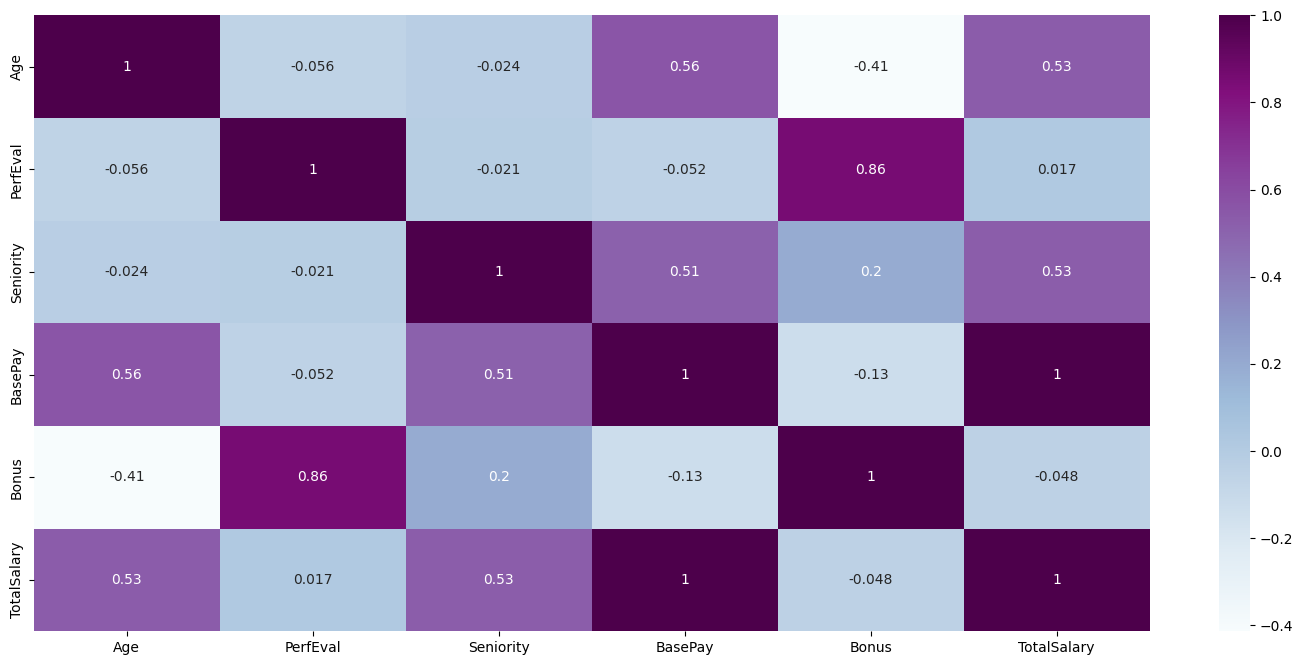

In [160]:
numeric_df = df.select_dtypes(include='number')

# Create the heatmap
fig = plt.figure(figsize=(18, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="BuPu")

# Show the plot
plt.show()

The heatmap provides a clear view of how the variables in the dataset relate to each other. Understanding these relationships is critical for analyzing the factors contributing to the gender pay gap and other compensation disparities. For example, knowing that BasePay and Total Salary are closely linked allows us to focus on base salary differences when comparing gender pay gaps, while the correlation between Bonus and PerfEval can help explain bonus disparities across different groups.

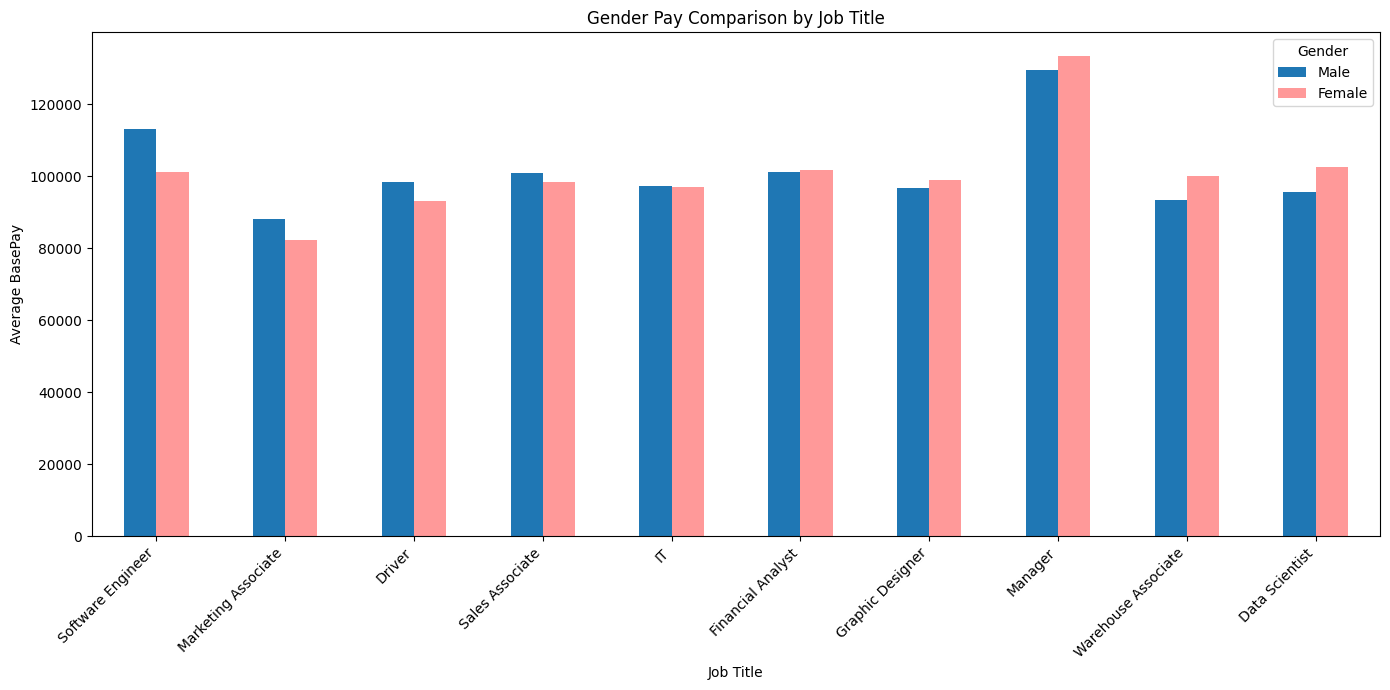

In [161]:
# Define custom colors: Blue for Male, Red for Female
custom_colors = ['#1f77b4', '#ff9999']  # Blue for Male, Red for Female

# Plot: Gender pay comparison by job title
pay_gap_data[['Male', 'Female']].plot(
    kind='bar',
    figsize=(14, 7),
    stacked=False,
    color=custom_colors  # Apply the two blue shades here
)

# Add titles and labels
plt.title("Gender Pay Comparison by Job Title")
plt.ylabel("Average BasePay")
plt.xlabel("Job Title")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


## Updated Approach:
We can group the data by both JobTitle and Education, then calculate the average BasePay for each combination of these two features, split by Gender. This will give a better understanding of how gender pay disparities are influenced by both job role and educational background.

Group by JobTitle, Education, and Gender: We're calculating the average BasePay for each combination of JobTitle, Education, and Gender. This allows for a more granular view of the gender pay gap, considering both the job title and education level.

Pivot Table: We create a pivot table with JobTitle and Education as the index and Gender as columns. This structure makes it easy to compare the average pay for males and females within each job and education category.



In [162]:
# Grouping by JobTitle, Education, and Gender, and calculating the mean BasePay
data = df.groupby(['JobTitle', 'Education', 'Gender']).agg({'BasePay': 'mean'}).reset_index()

# Pivoting the table to make JobTitle and Education as index, Gender as columns
pivot_data = data.pivot_table(index=['JobTitle', 'Education'], columns='Gender', values='BasePay')

# Calculating the pay gap between Male and Female
pivot_data['PayGap'] = pivot_data['Male'] - pivot_data['Female']

# Sorting by PayGap for better visualization
pivot_data_sorted = pivot_data.sort_values(by='PayGap', ascending=False)

# Display the result
pivot_data_sorted


Gender                                  Female           Male        PayGap
JobTitle            Education                                              
Software Engineer   PhD           89871.666667  112975.695652  23104.028986
                    Masters       88037.000000  109362.258065  21325.258065
Marketing Associate Masters       79479.500000   98576.000000  19096.500000
IT                  Masters       83498.272727  100875.461538  17377.188811
Software Engineer   High School   85167.000000  101218.100000  16051.100000
Driver              Masters       81189.166667   97175.000000  15985.833333
Marketing Associate High School   70444.416667   85295.000000  14850.583333
Sales Associate     Masters       90869.700000  101981.857143  11112.157143
                    College       84938.307692   95181.285714  10242.978022
Manager             PhD          118345.400000  125724.842105   7379.442105
Driver              College       82795.416667   87860.466667   5065.050000
Financial Analyst   College       93283.666667   96770.181818   3486.515152
Graphic Designer    College       86108.052632   89100.714286   2992.661654
Financial Analyst   PhD           92217.125000   95091.000000   2873.875000
IT                  College       90207.153846   92047.000000   1839.846154
Financial Analyst   High School   92002.533333   93381.166667   1378.633333
Driver              PhD          100353.545455  100993.090909    639.545455
Graphic Designer    Masters       92928.777778   93123.391304    194.613527
Driver              High School   84018.818182   83446.400000   -572.418182
Marketing Associate PhD           82132.000000   81427.000000   -705.000000
Warehouse Associate High School   86964.583333   86207.642857   -756.940476
Data Scientist      PhD           98767.750000   97640.615385  -1127.134615
Sales Associate     High School   88279.909091   86085.368421  -2194.540670
IT                  High School   86477.142857   83442.750000  -3034.392857
Data Scientist      College       89357.181818   85331.444444  -4025.737374
Warehouse Associate College       91625.214286   86928.818182  -4696.396104
Marketing Associate College       75508.708333   69083.333333  -6425.375000
Data Scientist      High School   83302.538462   76107.500000  -7195.038462
Sales Associate     PhD          107497.444444   99834.727273  -7662.717172
Graphic Designer    PhD           94545.500000   85227.100000  -9318.400000
Warehouse Associate PhD          101746.000000   91781.545455  -9964.454545
Manager             High School  128364.375000  117212.500000 -11151.875000
Financial Analyst   Masters      105493.454545   93560.235294 -11933.219251
Data Scientist      Masters      109708.307692   97686.937500 -12021.370192
Warehouse Associate Masters       91787.090909   79453.750000 -12333.340909
Manager             Masters      134379.800000  121927.937500 -12451.862500
Software Engineer   College      114811.000000  101076.823529 -13734.176471
Graphic Designer    High School  100981.100000   86197.600000 -14783.500000
IT                  PhD          101827.666667   82738.300000 -19089.366667
Manager             College                NaN  125497.347826           NaN

The grouping, pivoting, and pay gap calculation provided a clear and structured way to explore the gender pay gap across job titles and educational backgrounds. The visualization process revealed not only the overall pay differences between genders but also how factors like job titles and education levels play a role in shaping these disparities. By sorting the data, we can focus on areas where the pay gap is most pronounced, helping stakeholders target their efforts toward achieving a more equitable workforce.

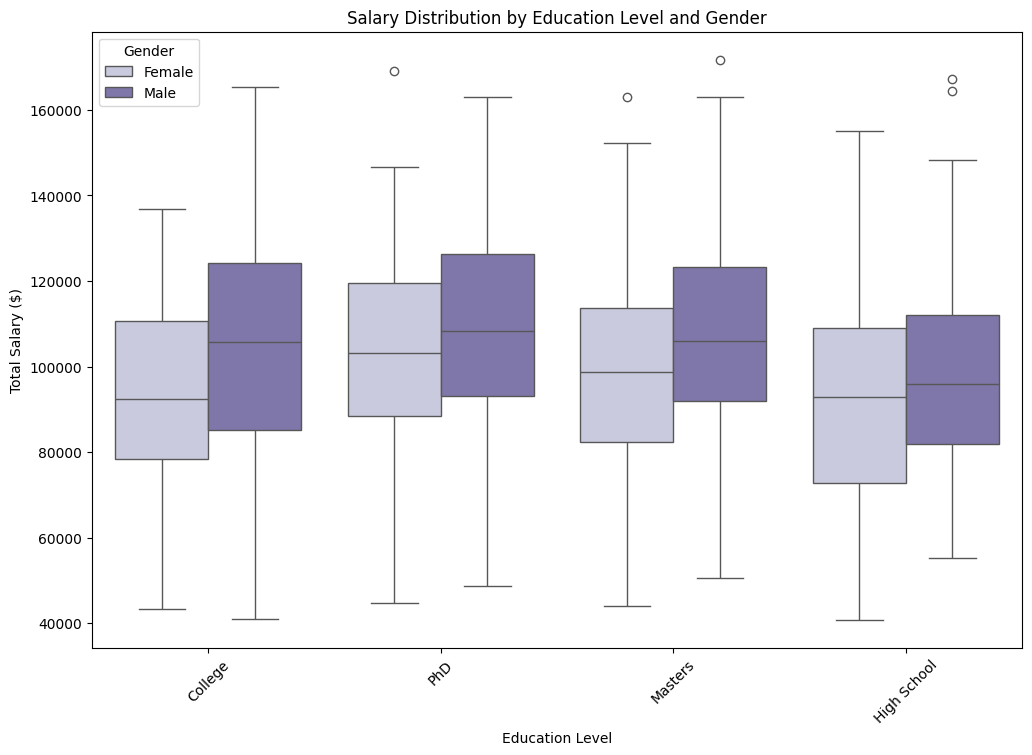

In [163]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Education', y='TotalSalary', hue='Gender', palette='Purples')
plt.title('Salary Distribution by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Total Salary ($)')
plt.xticks(rotation=45)
plt.show()


The boxplot provided valuable insights into the distribution of Total Salary across education levels and between genders. It clearly shows the salary disparity between men and women, highlighting areas where the pay gap might be more pronounced. This visualization is essential for understanding how education influences salary outcomes for different genders, and it can guide efforts to reduce the gender pay gap by focusing on educational attainment or exploring disparities within specific fields.

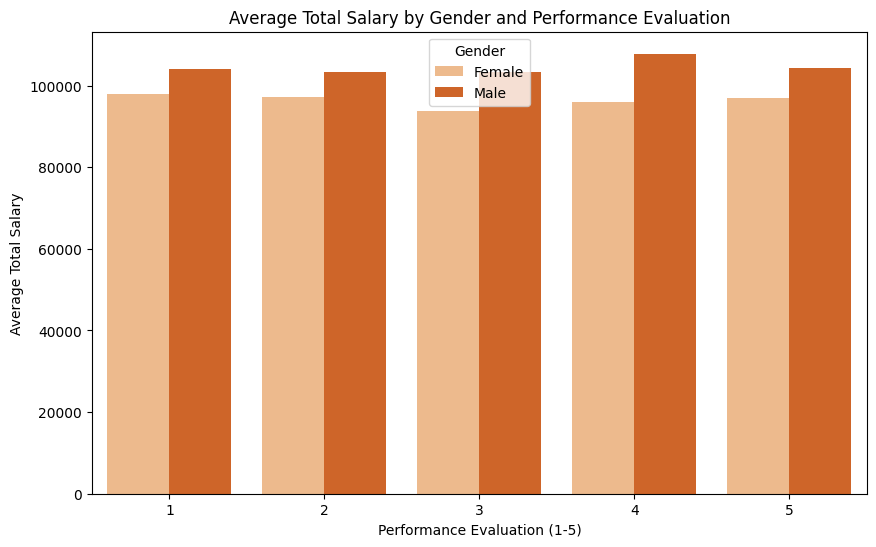

In [164]:
# Group data by Gender and PerfEval and calculate mean TotalSalary
gender_perf_salary = df.groupby(['Gender', 'PerfEval'])['TotalSalary'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_perf_salary, x='PerfEval', y='TotalSalary', hue='Gender', palette='Oranges')
plt.title('Average Total Salary by Gender and Performance Evaluation')
plt.xlabel('Performance Evaluation (1-5)')
plt.ylabel('Average Total Salary')
plt.legend(title='Gender')
plt.show()


The bar plot allowed us to visually explore the relationship between Performance Evaluation and Total Salary, broken down by gender. It provided valuable insights into how performance impacts salary outcomes and highlighted the persistent gender pay gap, even when considering performance evaluations. This visualization is important for understanding how gender-based salary disparities may be exacerbated or mitigated by performance ratings and could inform targeted initiatives to close the gender pay gap, particularly in high-performance categories.

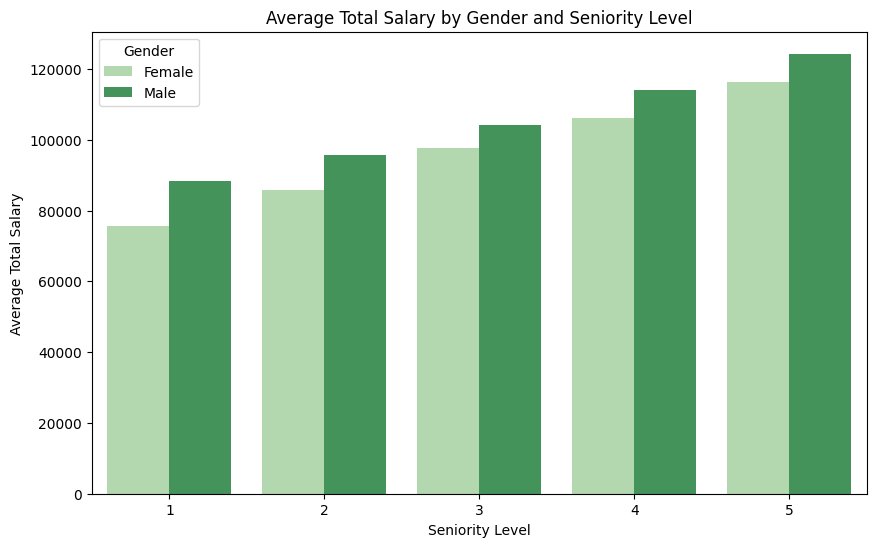

In [165]:
# Group data by Gender and Seniority and calculate mean TotalSalary
gender_seniority_salary = df.groupby(['Gender', 'Seniority'])['TotalSalary'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_seniority_salary, x='Seniority', y='TotalSalary', hue='Gender', palette='Greens')
plt.title('Average Total Salary by Gender and Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Average Total Salary')
plt.legend(title='Gender')
plt.show()


This bar plot effectively illustrates the relationship between seniority and salary, with a clear breakdown by gender. The visualization reinforces the presence of a persistent gender pay gap across all seniority levels, although the gap becomes more pronounced in higher seniority positions. Understanding this relationship is crucial for addressing and mitigating gender-based salary disparities, particularly in senior roles. This information could be used to inform organizational strategies aimed at ensuring more equitable salary practices across all levels of seniority.

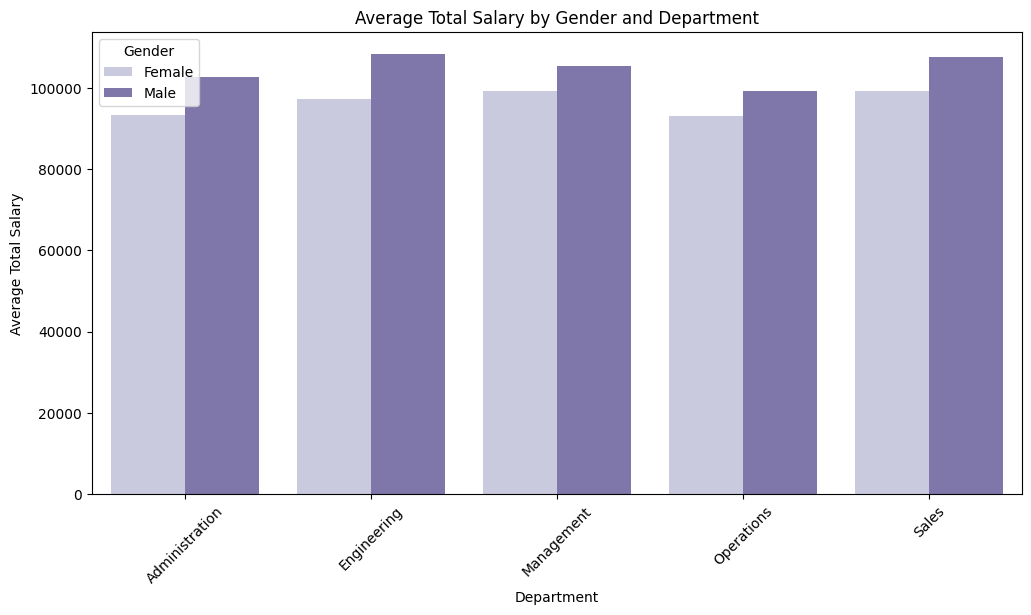

In [166]:
# Group data by Gender and Department and calculate mean TotalSalary
gender_dept_salary = df.groupby(['Gender', 'Dept'])['TotalSalary'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_dept_salary, x='Dept', y='TotalSalary', hue='Gender', palette='Purples')
plt.title('Average Total Salary by Gender and Department')
plt.xlabel('Department')
plt.ylabel('Average Total Salary')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


This bar plot offers valuable insights into the gender pay gap across various departments, shedding light on areas where pay disparities are most prevalent. It is clear that while some departments show relatively small gender differences in salary, others, particularly those with higher pay scales, exhibit significant gaps. This information can be used by organizations to target interventions aimed at reducing the gender pay gap, especially in departments where the gap is most pronounced.

There is a statistically significant difference in total pay between genders in the dataset. In other words, the data provides strong evidence that gender has an impact on total pay, and it is not likely due to random chance.

However, remember that statistical significance does not imply causation or provide insights into the reasons behind the gender pay gap. Further analysis may be needed to understand the factors contributing to this difference.

## Machine Learning Plan

This project explores the gender pay gap and aims to use machine learning for predicting salaries based on various features, such as gender, education, years of experience, and department. Below is the plan for integrating machine learning into this project.

1. Types of Machine Learning to be Used

    A. Regression (Supervised Learning)

    -Linear Regression: To understand the relationship between salary and features like education and years of experience.

    -Decision Tree Regression: To capture non-linear relationships and interactions between features.

    -Random Forest Regression: For robust predictions by considering a wider set of features and interactions.

    OR

    B. Classification (Supervised Learning)

    -Logistic Regression: To classify employees based on their pay gap compared to expected salary.

    -Random Forest Classification: For a more robust classification based on multiple features.

2. Issues in Making Machine Learning Happen
A. Data Quality Issues
Missing Data: We need to handle missing values, especially in columns like Age and Gender.
Data Imbalance: There could be an imbalance in the gender distribution across high-paying job titles, which may affect model performance.
B. Data Preprocessing
Feature Engineering: Converting categorical variables (e.g., Education Level and Job Title) into numerical values for machine learning models.
Normalization: Scaling features like years of experience and salary to ensure the models perform well.
C. Overfitting
Complex models may overfit the data. We will use cross-validation in decision trees to avoid this.

3. Potential Challenges
-Non-linear Relationships
Salary is influenced by complex, non-linear interactions between features. Models like linear regression may not capture these without careful feature engineering or more advanced techniques.

4. Plan for Next Steps
Data Preprocessing: Address missing values, encode categorical features, and scale the data.
Model Training: Train ML models, evaluate them using metrics like MAE for regression or accuracy for classification.

In [171]:
import pandas as pd

# Load the data
df3 = pd.read_csv('datasets/Glassdoor Gender Pay Gap.csv')

# Check the first few rows and basic stats
print(df3.head())
print(df3.info())
print(df3.describe(include='all'))


              JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus  
0          2    42363   9938  
1          5   108476  11128  
2          5    90208   9268  
3          4   108080  10154  
4          5    99464   9319  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non

In [172]:
# Features (X) and target (y)
X = df3.drop(columns=['BasePay'])  # Predicting 'BasePay'
y = df3['BasePay']

# Define categorical and numerical columns
categorical_features = ['JobTitle', 'Gender', 'Education', 'Dept']
numerical_features = ['Age', 'PerfEval', 'Seniority']


In [175]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numerical pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing numerical values
    ('scaler', StandardScaler())  # Scale to standard normal distribution
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing categories
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))  # One-hot encoding (drop first to avoid multicollinearity)
])

# Combine both pipelines into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [176]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (800, 8)
Test set size: (200, 8)


In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Linear Regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Decision Tree pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])


In [179]:
# Function to evaluate a model
def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)  # Train the model
    y_pred = pipeline.predict(X_test)  # Predict on test data
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics
    print(f"Model: {pipeline.named_steps['model'].__class__.__name__}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("")

# Evaluate all pipelines
evaluate_model(rf_pipeline, X_train, X_test, y_train, y_test)
evaluate_model(lr_pipeline, X_train, X_test, y_train, y_test)
evaluate_model(dt_pipeline, X_train, X_test, y_train, y_test)


Model: RandomForestRegressor
Mean Absolute Error (MAE): 8919.53
Mean Squared Error (MSE): 126512195.41
Root Mean Squared Error (RMSE): 11247.76
R-squared (R2): 0.8002

Model: LinearRegression
Mean Absolute Error (MAE): 7513.83
Mean Squared Error (MSE): 86510184.62
Root Mean Squared Error (RMSE): 9301.09
R-squared (R2): 0.8633

Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 12185.85
Mean Squared Error (MSE): 217413125.32
Root Mean Squared Error (RMSE): 14744.94
R-squared (R2): 0.6566



/Users/bidhatriamatya/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/bidhatriamatya/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/bidhatriamatya/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [181]:
# Feature importance for Random Forest
rf_model = rf_pipeline.named_steps['model']  # Access the model
feature_names = numerical_features + list(rf_pipeline.named_steps['preprocessor']
                .transformers_[1][1]  # Categorical transformer
                .named_steps['onehot'].get_feature_names_out(categorical_features))

importances = rf_model.feature_importances_

# Display feature importance
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Age: 0.3931
PerfEval: 0.0247
Seniority: 0.2772
JobTitle_Driver: 0.0064
JobTitle_Financial Analyst: 0.0050
JobTitle_Graphic Designer: 0.0058
JobTitle_IT: 0.0064
JobTitle_Manager: 0.1286
JobTitle_Marketing Associate: 0.0450
JobTitle_Sales Associate: 0.0040
JobTitle_Software Engineer: 0.0251
JobTitle_Warehouse Associate: 0.0041
Gender_Male: 0.0102
Education_High School: 0.0087
Education_Masters: 0.0107
Education_PhD: 0.0109
Dept_Engineering: 0.0082
Dept_Management: 0.0069
Dept_Operations: 0.0071
Dept_Sales: 0.0119


In [182]:
dt_model = dt_pipeline.named_steps['model']
feature_importances_dt = dt_model.feature_importances_
for name, importance in zip(feature_names, feature_importances_dt):
    print(f"{name}: {importance:.4f}")


Age: 0.3793
PerfEval: 0.0280
Seniority: 0.2851
JobTitle_Driver: 0.0084
JobTitle_Financial Analyst: 0.0053
JobTitle_Graphic Designer: 0.0056
JobTitle_IT: 0.0057
JobTitle_Manager: 0.1335
JobTitle_Marketing Associate: 0.0454
JobTitle_Sales Associate: 0.0032
JobTitle_Software Engineer: 0.0199
JobTitle_Warehouse Associate: 0.0046
Gender_Male: 0.0050
Education_High School: 0.0120
Education_Masters: 0.0094
Education_PhD: 0.0117
Dept_Engineering: 0.0127
Dept_Management: 0.0052
Dept_Operations: 0.0073
Dept_Sales: 0.0126


After comparing the model performance metrics (MAE, MSE, RMSE, and R²), it's clear that Linear Regression outperforms the other models based on the R² value (0.8633) and lower MAE and RMSE. 

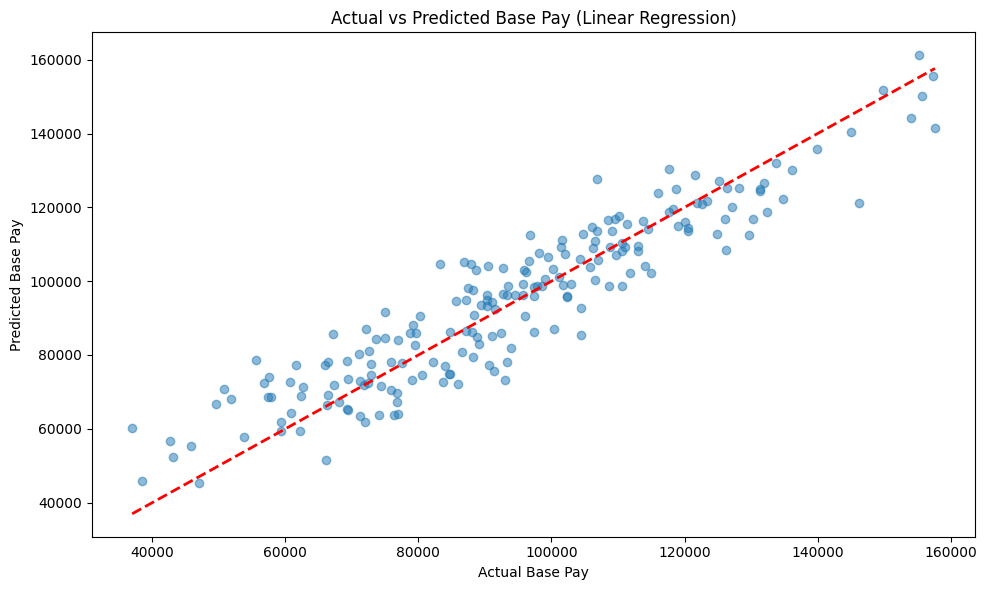

In [180]:
lr_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_pipeline.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel('Actual Base Pay')
plt.ylabel('Predicted Base Pay')
plt.title('Actual vs Predicted Base Pay (Linear Regression)')
plt.tight_layout()
plt.show()


In [186]:
# Predict the salaries for all employees in the test set
y_pred = lr_pipeline.predict(X_test)

# Add predictions to the test dataset
X_test['PredictedBasePay'] = y_pred

# Filter for males and females
male_pred = X_test[X_test['Gender'] == 'Male']['PredictedBasePay']
female_pred = X_test[X_test['Gender'] == 'Female']['PredictedBasePay']

# Calculate the average predicted salary for each gender
male_avg_salary = male_pred.mean()
female_avg_salary = female_pred.mean()

# Calculate the salary difference (gender pay gap)
salary_gap = male_avg_salary - female_avg_salary

print(f"Average Predicted Salary for Males: {male_avg_salary:.2f}")
print(f"Average Predicted Salary for Females: {female_avg_salary:.2f}")
print(f"Gender Pay Gap (Difference in Predicted Salaries): {salary_gap:.2f}")


Average Predicted Salary for Males: 97262.69
Average Predicted Salary for Females: 91772.13
Gender Pay Gap (Difference in Predicted Salaries): 5490.56


Using this model, we estimated the average predicted salary for males to be $97,262.69 and for females to be $91,772.13. The calculated gender pay gap, which represents the difference in predicted salaries for males and females, was $5,490.56.

This gap highlights a disparity in pay between male and female employees, suggesting that even after accounting for factors such as job title, education, and seniority, gender still plays a role in determining salary. This result underscores the importance of addressing the gender pay gap to ensure equitable pay practices across all levels and roles within an organization.

Further investigation and more complex models could be employed to dive deeper into the underlying causes of this gap and explore potential solutions

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

Course videos, notes, geeksforgeeks website

In [189]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 18959 bytes to source.py
